In [42]:
import numpy as np
import sep
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

opens the first fits file using astropy

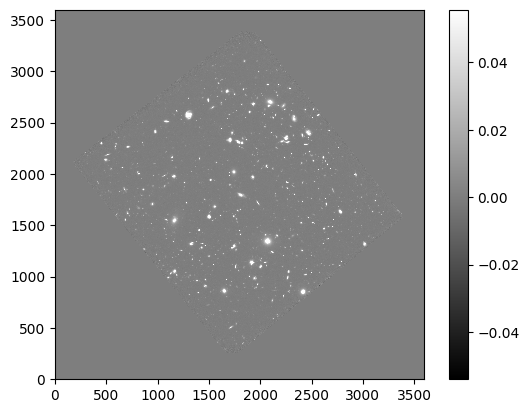

In [60]:
with fits.open("hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits") as hdul:
    data = hdul[0].data

# Display the image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()
plt.savefig('105.png')

here i had to change the type to float because I kept getting a valuerrror for sep.Background(data)

In [44]:
data = data.astype(float)
bkg = sep.Background(data)
# get a "global" mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


In [45]:
# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()
# bkg_image = np.array(bkg) # equivalent to above

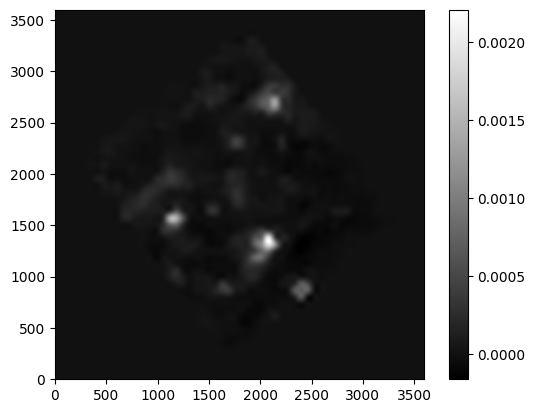

In [46]:
# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('105_1.png') 

In [47]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

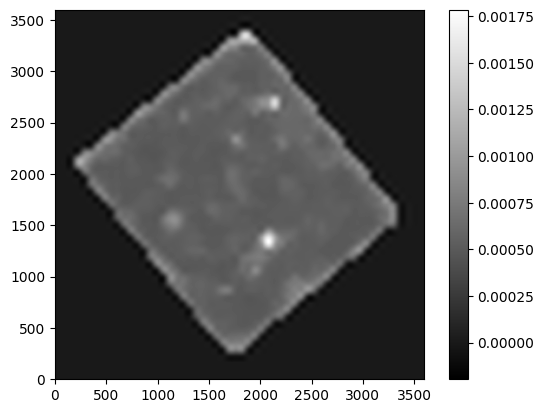

In [48]:
# show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('105_2.png')

In [59]:
# Subtract background
data_sub = data - bkg

In [51]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [52]:
# how many objects were detected
len(objects)

8640

detected the objects using the same method as the tutorial, not if this is correct but it think it detected every single star

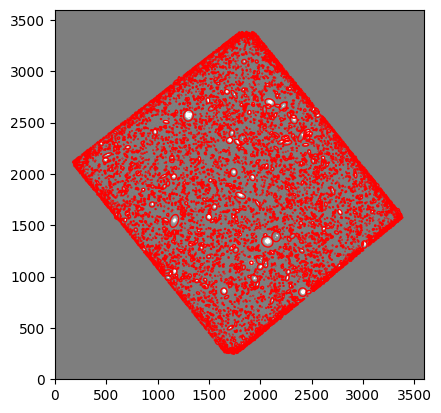

In [66]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.savefig('105_3.png')

In [54]:
# available fields
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [67]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

In [68]:
# show the first 10 objects results:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 0.031282 +/- 0.176890
object 1: flux = 0.031018 +/- 0.176142
object 2: flux = -0.024388 +/- 0.002883
object 3: flux = 0.001947 +/- 0.044219
object 4: flux = 0.012457 +/- 0.111649
object 5: flux = -0.011228 +/- 0.002875
object 6: flux = 0.029368 +/- 0.171394
object 7: flux = -0.009126 +/- 0.002875
object 8: flux = 0.048023 +/- 0.219161
object 9: flux = 0.027840 +/- 0.166877


calculated the mean, median and standard deviation. the outlier is the max flux. for the histogram, I adjusted the x axis range to 0,1 becuase the flux values were less than 1

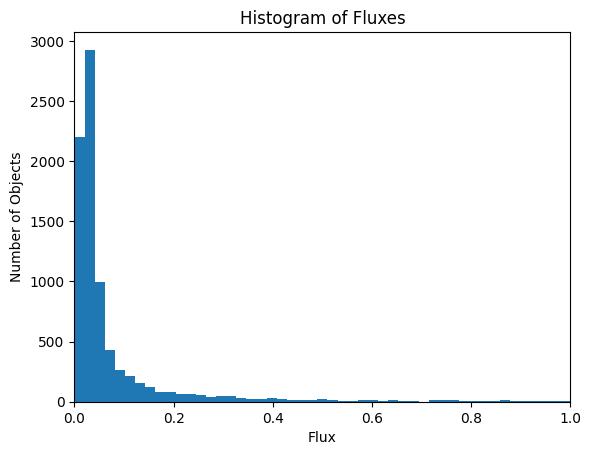

Mean of Flux Distribution: 0.36186200072018937
Median of Flux Distribution: 0.03095655805023853
Standard Deviation of Flux Distribution: 9.24352784277779
Maximum Flux (Largest Outlier): 807.2972835731507
Largest Outlier is 87.29734310292692 standard deviations away from the mean


In [62]:
mean_flux = np.mean(flux)
median_flux = np.median(flux)
std_flux = np.std(flux)

# Identifying the largest outlier
max_flux = np.max(flux)
max_flux_index = np.argmax(flux)
outlier_position = (objects['x'][max_flux_index], objects['y'][max_flux_index])
outlier_stddevs = (max_flux - mean_flux) / std_flux
outlier_stddevs_away = (max_flux - mean_flux) / std_flux
# Histogram of fluxes
plt.hist(flux, bins=np.linspace(0, 1, 50))
plt.title('Histogram of Fluxes')
plt.xlabel('Flux')
plt.ylabel('Number of Objects')
plt.xlim(0, 1)  # Set x-axis limits 
plt.show()

print("Mean of Flux Distribution:", mean_flux)
print("Median of Flux Distribution:", median_flux)
print("Standard Deviation of Flux Distribution:", std_flux)
print("Maximum Flux (Largest Outlier):", max_flux)
print("Largest Outlier is", outlier_stddevs_away, "standard deviations away from the mean")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


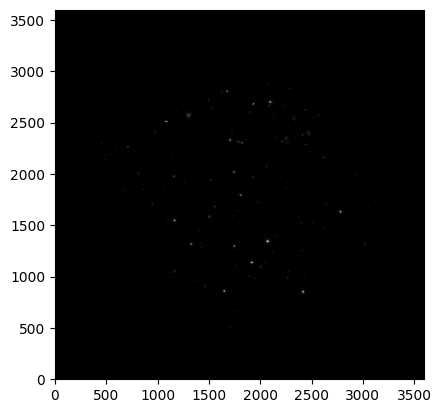

In [64]:
with fits.open("hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits") as hdul:
    f125w_data = hdul[0].data
with fits.open("hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits") as hdul:
    f160w_data = hdul[0].data

# Create a 3-color image
rgb_image = np.zeros((data.shape[0], data.shape[1], 3), dtype=float)
rgb_image[..., 0] = f160w_data  # Red channel
rgb_image[..., 1] = f125w_data  # Green channel
rgb_image[..., 2] = data        # Blue channel (f105w)

# Display and save the RGB image
plt.imshow(rgb_image, origin='lower')
plt.savefig('udf_false_color.png')